In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf                                
import keras
from keras.models import Sequential                                          # Importing keras model sequential 
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D          # Importing keras layers 

from sklearn.model_selection import train_test_split

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Test_CNN.csv to Test_CNN.csv
Saving Train_CNN.csv to Train_CNN.csv


In [3]:
import io
df_Train = pd.read_csv(io.BytesIO(uploaded['Train_CNN.csv']))
df_Test = pd.read_csv(io.BytesIO(uploaded['Test_CNN.csv']))

In [4]:
print(df_Train.shape)
df_Train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df_Test.shape)
df_Test.head(10)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df_Train['label']

In [7]:
X = df_Train.iloc[:, df_Train.columns != 'label']

In [8]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


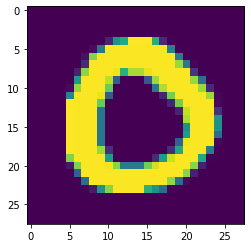

In [9]:
img = X.iloc[4].values
img = img.reshape((28,28))
plt.imshow(img)

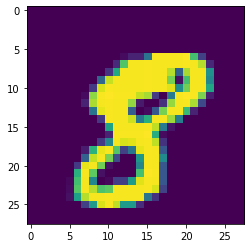

In [10]:
img = X.iloc[10].values
img = img.reshape((28,28))
plt.imshow(img)

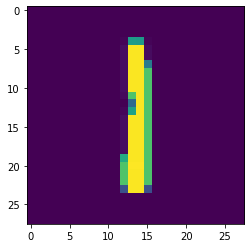

In [11]:
img = X.iloc[2].values
img = img.reshape((28,28))
plt.imshow(img)

**Reshaping of both dataset.**

In [17]:
# Reshape
X = X.reshape((-1,28,28,1))
df_Test = df_Test.values.reshape((-1,28,28,1))

print('X shape = ', X.shape)
print('Test df shape = ', df_Test.shape)

X shape =  (42000, 28, 28, 1)
Test df shape =  (28000, 28, 28, 1)


**Normalization process.**

In [19]:
# Normalize 
X_n = X/255.0
df_Test_n = df_Test/255.0

print('X shape = ', X_n.shape)
print('Test df shape = ', df_Test_n.shape)

X shape =  (42000, 28, 28, 1)
Test df shape =  (28000, 28, 28, 1)


In [20]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 10)

**Splliting of the dataset.**

In [61]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_n, y, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

print('X_train_full shape = ', X_train_full.shape)
print('X_train shape = ', X_train.shape)
print('X_valid shape = ', X_valid.shape)
print('X_test shape = ', X_test.shape)

X_train_full shape =  (31500, 28, 28, 1)
X_train shape =  (23625, 28, 28, 1)
X_valid shape =  (7875, 28, 28, 1)
X_test shape =  (10500, 28, 28, 1)


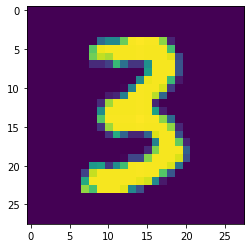

In [22]:
plt.imshow(X_train[1][:,:,0])

**Keras model**


**Below picture depicts a Convolutional neural network**
1.   CNN is used for image classifiction, object detection etc.



![alt text](https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

**Below picture shows how a conv2D layers works.**

![alt text](https://sipl.eelabs.technion.ac.il/wp-content/uploads/sites/6/2016/10/project-image-1599-2-13.png)

**MaxPooling2D layer.**

![alt text](https://static.packt-cdn.com/products/9781788629416/graphics/B08956_01_14.jpg)

**Flatten layer.**

![alt text](https://missinglink.ai/wp-content/uploads/2019/04/Group-5.png)

In [62]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1)))       
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [keras.metrics.CategoricalAccuracy()])

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        1168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)              

In [65]:
model_history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, verbose = 2, validation_data = (X_valid, y_valid))

Train on 23625 samples, validate on 7875 samples
Epoch 1/10
 - 10s - loss: 0.3745 - categorical_accuracy: 0.8839 - val_loss: 0.2094 - val_categorical_accuracy: 0.9404
Epoch 2/10
 - 10s - loss: 0.3237 - categorical_accuracy: 0.9012 - val_loss: 0.1803 - val_categorical_accuracy: 0.9468
Epoch 3/10
 - 10s - loss: 0.2972 - categorical_accuracy: 0.9101 - val_loss: 0.1564 - val_categorical_accuracy: 0.9542
Epoch 4/10
 - 10s - loss: 0.2683 - categorical_accuracy: 0.9219 - val_loss: 0.1427 - val_categorical_accuracy: 0.9581
Epoch 5/10
 - 10s - loss: 0.2441 - categorical_accuracy: 0.9255 - val_loss: 0.1263 - val_categorical_accuracy: 0.9614
Epoch 6/10
 - 10s - loss: 0.2243 - categorical_accuracy: 0.9327 - val_loss: 0.1193 - val_categorical_accuracy: 0.9657
Epoch 7/10
 - 10s - loss: 0.2137 - categorical_accuracy: 0.9389 - val_loss: 0.1123 - val_categorical_accuracy: 0.9648
Epoch 8/10
 - 10s - loss: 0.1984 - categorical_accuracy: 0.9421 - val_loss: 0.1027 - val_categorical_accuracy: 0.9676
Epoch 9

In [66]:
test_score = model.evaluate(X_test, y_test)
print('Loss score = ', test_score[0])
print('Accuracy score = ', test_score[1]*100)

10500/10500 [==============================] - 2s 168us/step
Loss score =  0.0900708027499994
Accuracy score =  97.34285473823547


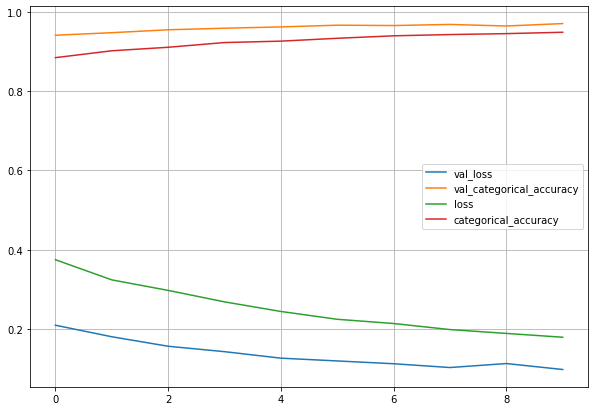

In [67]:
pd.DataFrame(model_history.history).plot(figsize = (10,7))
plt.gca()
plt.grid(True)
plt.show()

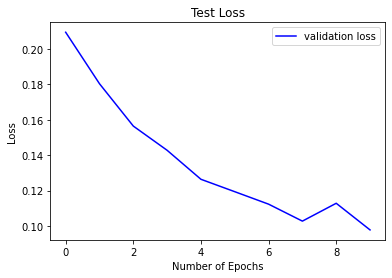

In [68]:
plt.plot(model_history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [69]:
y_pred = model.predict_classes(X_test)
y_pred

array([8, 1, 9, ..., 7, 4, 4])

In [70]:
y_pred[0] # predicted value

8

In [71]:
y_test[0] # tested value

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

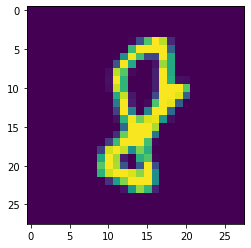

In [72]:
plt.imshow((X_test[0].reshape(28,28)))

In [73]:
y_pred[10] # predicted value

6

In [74]:
y_test[10]  # tested value

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

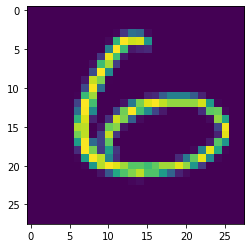

In [75]:
plt.imshow(X_test[10].reshape(28,28))